In [212]:
import matplotlib.pyplot as plt
from cycler import cycler

tableau20 = [(31, 119, 180), (174, 199, 232), (255, 127, 14), (255, 187, 120),    
             (44, 160, 44), (152, 223, 138), (214, 39, 40), (255, 152, 150),    
             (148, 103, 189), (197, 176, 213), (140, 86, 75), (196, 156, 148),    
             (227, 119, 194), (247, 182, 210), (127, 127, 127), (199, 199, 199),    
             (188, 189, 34), (219, 219, 141), (23, 190, 207), (158, 218, 229)] 
for i in range(len(tableau20)):
    r, g, b = tableau20[i]    
    tableau20[i] = (r / 255., g / 255., b / 255.)
    
plt.rc('legend', frameon=True,fancybox=True,fontsize=14)
plt.rc('xtick', labelsize=12)
plt.rc('ytick', labelsize=12)
plt.rc('grid', linestyle="--", color='grey',alpha = 0.2)
plt.rc('font', size=14, family='sans-serif',style='normal',weight='normal')
plt.rc('axes', labelsize=14, titlesize=14,
       titleweight='bold',prop_cycle=(cycler('color',tableau20)))

plt.rc('figure', figsize=(14, 8),titlesize=16)

In [213]:
import pandas as pd
import numpy as np
import datetime
import os
%matplotlib inline

import matplotlib as mpl
#import seaborn as sns

In [214]:
df = pd.read_pickle(os.path.join('data','quote=FING-BALIV-SDBNCC-BLUMI-SDBNET-BTHULEHM-B&start=2016-10-10&end=2017-10-06&interval=1440min.pkl'))
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1535 entries, 0 to 1534
Data columns (total 7 columns):
datetime    1535 non-null datetime64[ns]
stock       1535 non-null object
open        1535 non-null float64
high        1535 non-null float64
low         1535 non-null float64
close       1535 non-null float64
volume      1535 non-null float64
dtypes: datetime64[ns](1), float64(5), object(1)
memory usage: 84.0+ KB


,datetime,stock,open,high,low,close,volume
0,2016-10-10 17:30:00,FING-B,95.30,99.1,94.50,99.1,5475622.0
1,2016-10-11 17:30:00,FING-B,98.00,98.1,94.60,94.7,6682251.0
2,2016-10-12 17:30:00,FING-B,94.75,95.0,91.30,92.0,6477604.0
3,2016-10-13 17:30:00,FING-B,92.00,93.2,89.65,90.0,6801763.0
4,2016-10-14 17:30:00,FING-B,90.60,91.0,88.55,89.7,5316859.0


open                                              \
stock               ALIV-SDB FING-B   HM-B LUMI-SDB  NCC-B NET-B   THULE   
datetime                                                                   
2016-10-10 17:30:00    908.0  95.30  246.0    33.73  222.0   NaN  142.50   
2016-10-11 17:30:00    905.0  98.00  251.3    34.39  223.8   NaN  143.50   
2016-10-12 17:30:00    904.5  94.75  250.8    34.42  219.7   NaN  140.50   
2016-10-13 17:30:00    902.0  92.00  254.5    34.53  221.0   NaN  142.25   
2016-10-14 17:30:00    886.5  90.60  256.0    33.91  218.0   NaN  143.00   

                        high                  ...     close                \
stock               ALIV-SDB FING-B   HM-B    ...     NCC-B NET-B   THULE   
datetime                                      ...                           
2016-10-10 17:30:00    914.5   99.1  252.0    ...     223.7   NaN  143.25   
2016-10-11 17:30:00    909.5   98.1  252.7    ...     220.0   NaN  142.00   
2016-10-12 17:30:00    907.0   95.0  257.2    ...     221.9   NaN  142.50   
2016-10-13 17:30:00    902.0   93.2  254.5    ...     222.5   NaN  142.75   
2016-10-14 17:30:00    893.5   91.0  259.3    ...     225.8   NaN  145.00   

                       volume                                             \
stock                ALIV-SDB     FING-B       HM-B   LUMI-SDB     NCC-B   
datetime                                                                   
2016-10-10 17:30:00  169525.0  5475622.0  2928230.0   845902.0  240426.0   
2016-10-11 17:30:00  198259.0  6682251.0  2545826.0  1068753.0  315068.0   
2016-10-12 17:30:00  129675.0  6477604.0  4080455.0  1083221.0  295755.0   
2016-10-13 17:30:00  192733.0  6801763.0  2926937.0   913056.0  214083.0   
2016-10-14 17:30:00  240887.0  5316859.0  3729680.0   696082.0  485440.0   

                                     
stock               NET-B     THULE  
datetime                             
2016-10-10 17:30:00   NaN   41264.0  
2016-10-11 17:30:00   NaN   74840.0  
2016-10-12 17:30:00   NaN   64153.0  
2016-10-13 17:30:00   NaN   33768.0  
2016-10-14 17:30:00   NaN  126133.0  

[5 rows x 35 columns]

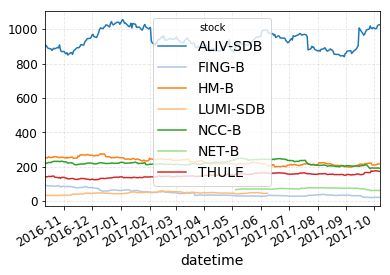

In [215]:
df_stock = df.groupby(['datetime','stock']).sum().unstack()
stocks = df_stock['close'].columns
df_stock['close'].plot(grid=True)
df_stock.head()

In [216]:
# ADD MEASURES

df_stock = df_stock.join(df_stock[['high']].div(df_stock['low'])
                         .sub(1).mul(100).rename(columns={'high':'x_low_high'}))
df_stock = df_stock.join(df_stock[['high']].div(df_stock['open'])
                         .sub(1).mul(100).rename(columns={'high':'x_open_high'}))
# SHIFT SINGLE
# open/close.shift(1) = GAP
# close/close.shift(1) = GAP + DAY CHANGE (WHAT YOU SEE)
df_stock = df_stock.join(df_stock[['open']].div(df_stock['close'].shift(periods=1))
                         .sub(1).mul(100).rename(columns={'open':'x_close_open'}))

for days in np.arange(1,11):
    # look at at days back total change
    df_stock = df_stock.join(df_stock[['open']].div(df_stock['open'].shift(periods=days))
                             .sub(1).mul(100).rename(columns={'open':'x_open_open_days_'+str(days)}))
    # Look at days back daily change
    df_stock = df_stock.join(df_stock[['open']].shift(periods=days-1).div(df_stock['open'].shift(periods=days))
                             .sub(1).mul(100).rename(columns={'open':'x_open_open_day_'+str(days)}))
    
#PREDICTORS, SHIFT BOTH BACK IN TIME, SEE IN FUTURE
#GAP FIRST DAY EXCLUDED SINCE CLOSE PRICE INCLUDED IN X (NO TIME TO TRADE)
# close.shift(-1)/open.shift(1) = NEXT DAY OUTCOME
# close.shift(-days)/open.shift(1) = NEXT X DAYS OUTCOME

for days in np.arange(0,11):
    df_stock = df_stock.join(df_stock[['close']].shift(periods=-days).div(df_stock['open'])
                             .sub(1).mul(100).rename(columns={'close':'y_open_close_days_'+str(days)}))
    
df_stock.head()

open                                              \
stock               ALIV-SDB FING-B   HM-B LUMI-SDB  NCC-B NET-B   THULE   
datetime                                                                   
2016-10-10 17:30:00    908.0  95.30  246.0    33.73  222.0   NaN  142.50   
2016-10-11 17:30:00    905.0  98.00  251.3    34.39  223.8   NaN  143.50   
2016-10-12 17:30:00    904.5  94.75  250.8    34.42  219.7   NaN  140.50   
2016-10-13 17:30:00    902.0  92.00  254.5    34.53  221.0   NaN  142.25   
2016-10-14 17:30:00    886.5  90.60  256.0    33.91  218.0   NaN  143.00   

                        high                  ...    y_open_close_days_9  \
stock               ALIV-SDB FING-B   HM-B    ...                  NCC-B   
datetime                                      ...                          
2016-10-10 17:30:00    914.5   99.1  252.0    ...               4.684685   
2016-10-11 17:30:00    909.5   98.1  252.7    ...               3.932082   
2016-10-12 17:30:00    907.0   95.0  257.2    ...               5.644060   
2016-10-13 17:30:00    902.0   93.2  254.5    ...               4.751131   
2016-10-14 17:30:00    893.5   91.0  259.3    ...               5.963303   

                                    y_open_close_days_10                      \
stock               NET-B     THULE             ALIV-SDB    FING-B      HM-B   
datetime                                                                       
2016-10-10 17:30:00   NaN -1.754386            -1.541850 -5.508919  4.512195   
2016-10-11 17:30:00   NaN -3.484321            -1.546961 -6.836735  1.352965   
2016-10-12 17:30:00   NaN -2.846975             0.497512 -6.807388  1.395534   
2016-10-13 17:30:00   NaN -2.636204            -2.494457 -8.586957  0.432220   
2016-10-14 17:30:00   NaN -6.468531            -1.861252 -5.353201  0.390625   

                                                         
stock                LUMI-SDB     NCC-B NET-B     THULE  
datetime                                                 
2016-10-10 17:30:00  0.237178  4.774775   NaN -2.807018  
2016-10-11 17:30:00  0.378017  3.708668   NaN -4.878049  
2016-10-12 17:30:00  1.975596  5.370960   NaN -1.423488  
2016-10-13 17:30:00  1.071532  4.524887   NaN -5.975395  
2016-10-14 17:30:00  6.163374  7.110092   NaN -2.797203  

[5 rows x 273 columns]

In [217]:
# ADD CAT INSTEAD OF FLOAT
df_stock = df_stock.join(df_stock[['x_open_open_day_1']].rename(columns={'x_open_open_day_1':'x_open_open_day_1_up'}))
df_stock = df_stock.stack()

mask = df_stock['x_open_open_day_1'] < 0
df_stock.loc[df_stock['x_open_open_day_1'][mask].index,'x_open_open_day_1_up'] = False
mask = df_stock['x_open_open_day_1'] > 0
df_stock.loc[df_stock['x_open_open_day_1'][mask].index,'x_open_open_day_1_up'] = True
df_stock = df_stock.unstack()

In [218]:
df_stock_swap = df_stock.swaplevel(axis=1)
df_stock_swap.head()

stock,ALIV-SDB,FING-B,HM-B,LUMI-SDB,NCC-B,NET-B,THULE,ALIV-SDB,FING-B,HM-B,...,NCC-B,NET-B,THULE,ALIV-SDB,FING-B,HM-B,LUMI-SDB,NCC-B,NET-B,THULE
,close,close,close,close,close,close,close,high,high,high,...,y_open_close_days_8,y_open_close_days_8,y_open_close_days_8,y_open_close_days_9,y_open_close_days_9,y_open_close_days_9,y_open_close_days_9,y_open_close_days_9,y_open_close_days_9,y_open_close_days_9
datetime,,,,,,,,,,,,,,,,,,,,,
2016-10-10 17:30:00,909.5,99.1,251.4,34.40,223.7,NaN,143.25,914.5,99.1,252.0,...,4.234234,NaN,2.456140,-2.422907,-7.974816,5.609756,3.083309,4.684685,NaN,-1.754386
2016-10-11 17:30:00,904.5,94.7,251.2,34.49,220.0,NaN,142.00,909.5,98.1,252.7,...,3.842717,NaN,-2.439024,-1.215470,-8.112245,2.307998,-1.686537,3.932082,NaN,-3.484321
2016-10-12 17:30:00,903.0,92.0,254.7,34.95,221.9,NaN,142.50,907.0,95.0,257.2,...,5.871643,NaN,-1.423488,-1.492537,-3.641161,1.555024,0.290529,5.644060,NaN,-2.846975
2016-10-13 17:30:00,892.5,90.0,252.5,33.54,222.5,NaN,142.75,902.0,93.2,254.5,...,5.022624,NaN,-4.042179,0.776053,-4.021739,-0.078585,1.650738,4.751131,NaN,-2.636204
2016-10-14 17:30:00,889.0,89.7,258.5,33.77,225.8,NaN,145.00,893.5,91.0,259.3,...,6.192661,NaN,-3.146853,-0.789622,-7.174393,-0.156250,2.919493,5.963303,NaN,-6.468531


### Correlation

In [25]:
#CHECK CORRELATION BETWEEN MEASURES
import seaborn as sns

corr_var = [x for x in np.unique(df_stock.columns.get_level_values(level=0)) if 'x_' in x or 'y_' in x]
print(corr_var)
for stock in stocks:
    f, ax = plt.subplots(1,1)
    corr = df_stock_swap[stock][corr_var].corr()
    sns.heatmap(corr,square=True, ax=ax)
    ax.set_title(stock)
    #f.savefig(stock+'.png', dpi=100,bbox_inches='tight')

ImportError: No module named 'seaborn'

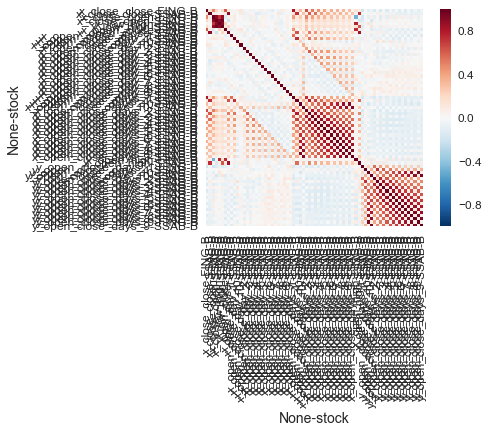

In [125]:
#CHECK CORRELATION BETWEEN MEASURES AND STOCKS!
import seaborn as sns

f, ax = plt.subplots(1,1)

corr = df_stock[corr_var].corr()
sns.heatmap(corr,square=True, ax=ax)

### What happened x days after a decline?

(-10, 10)

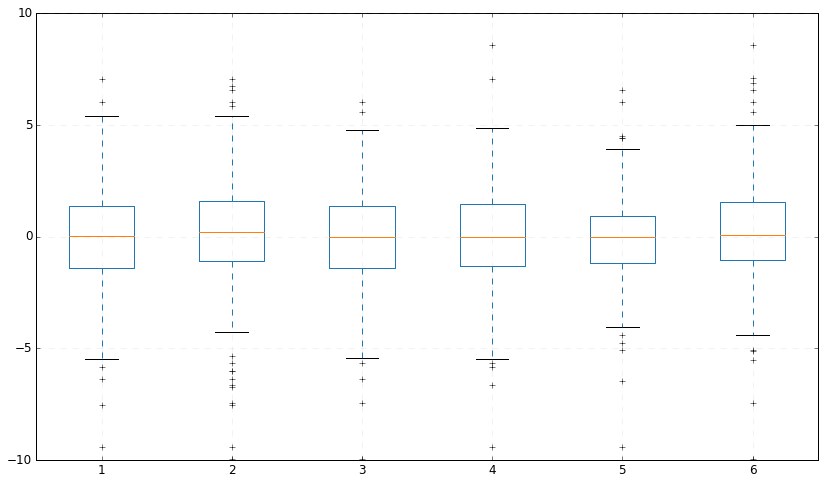

In [32]:
# DAY
f, ax = plt.subplots(1,1)
x_days = 1
pct_change = -2
xs = [x for x in np.unique(df_stock.columns.get_level_values(level=0)) if 'x_open_open_days_' in x]
df_days = []
for x_days in [1,2,3,4,5,6]:
    df_temp = (
        df_stock['x_close_close'][(df_stock['x_close_close']<pct_change).shift(x_days).replace(np.nan,False)]
        .stack().rename(str(x_days)).reset_index()[str(x_days)]
    )
    df_days.append(df_temp)
df_days = pd.concat(df_days,axis=1)
df_days.plot(kind='box', grid=True, ax=ax)
ax.set_ylim([-10,10])

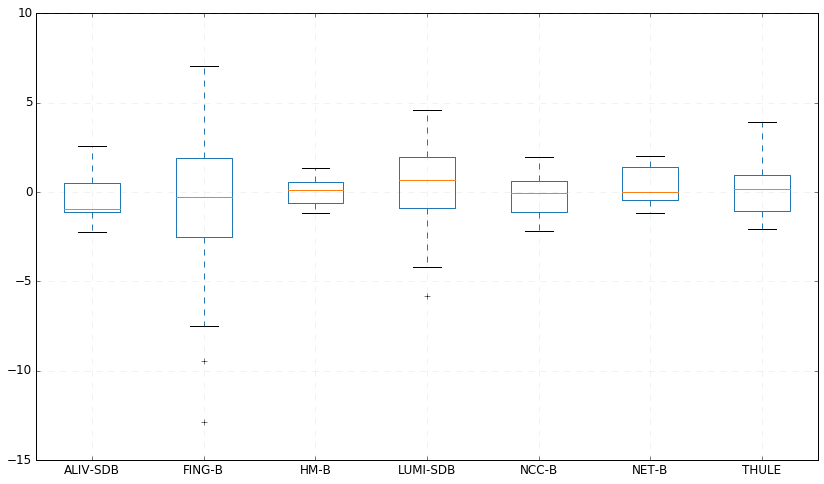

In [34]:
# STOCK
x_days = 1
df_stock['x_close_close'][(df_stock['x_close_close']<pct_change).shift(x_days).replace(np.nan,False)].plot(kind='box',grid=True)

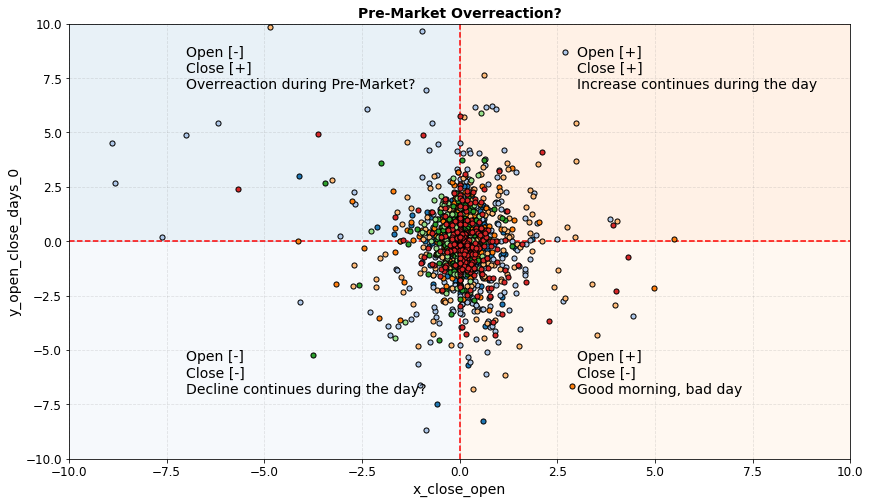

In [67]:
#df_stock_swap = df_stock.swaplevel(axis=1)
import matplotlib.patches as patches
# Close price change dependancy
f, ax = plt.subplots(1,1)
x = 'x_close_open'
y = 'y_open_close_days_0'
#for days in []
for nr,stock in enumerate(stocks):
    #print(stock)
    df_sel = df_stock_swap[stock]
    #print('Neg:',df_sel[df_sel[x]<0][y].replace(np.inf,np.nan).dropna().mean())
    #print('Pos:',df_sel[df_sel[x]>0][y].replace(np.inf,np.nan).dropna().mean())
    df_sel.plot(ax=ax,kind='scatter',x=x,y=y,grid=True,s=26,color=tableau20[nr],edgecolor='black',legend=False,zorder=3)
#ax.legend(stocks)
ax.set_title('Pre-Market Overreaction?')
ax.axhline(0,ls = '--',color='red')
ax.axvline(0,ls = '--',color='red')
#ax.set_xlim([-10,10])
#plt.axvline(-1,ls='--',color='r')
#ax.axvspan(xmin=-10,xmax=0,alpha = 0.1,zorder=1)
for nr,x,y in zip([0,1,2,3],[-10,-10,0,0],[0,-10,0,-10]):
    ax.add_patch(
        patches.Rectangle(
            (x,y),   # (x,y)
            10,          # width
            10,          # height
            alpha = 0.1,
            color = tableau20[nr]
            ))

ax.text(-7,7,'Open [-]\nClose [+]\nOverreaction during Pre-Market?')
ax.text(-7,-7,'Open [-]\nClose [-]\nDecline continues during the day?')
ax.text(3,7,'Open [+]\nClose [+]\nIncrease continues during the day')
ax.text(3,-7,'Open [+]\nClose [-]\nGood morning, bad day')
ax.set_xlim([-10,10])
ax.set_ylim([-10,10])
f.savefig('fig/overreaction.png', dpi=100,bbox_inches='tight')

In [219]:
def cumsum_reset(df):
    df = df.rename('x').to_frame()
    df['up_down'] = 0
    up_days = 0
    down_days = 0
    for idx, value in df['x'].iteritems():
        if value==False:
            down_days = down_days-1
            up_days = 0
            df.set_value(idx,'up_down',down_days)
        elif value==True:
            up_days = up_days+1
            down_days = 0
            df.set_value(idx,'up_down',up_days)
        else:
            df.set_value(idx,'up_down',0)
            down_days = 0
            up_days = 0
    return df['up_down']
    #print(df.head(14))
#a.cumsum()-a.cumsum().where(~a).ffill().fillna(0).astype(int)
df_stock = df_stock.join(df_stock[['x_open_open_day_1_up']].apply(cumsum_reset,axis=0)
                         .rename(columns={'x_open_open_day_1_up':'x_open_open_day_1_streak'}))
df_stock['x_open_open_day_1_streak'].head()

stock,ALIV-SDB,FING-B,HM-B,LUMI-SDB,NCC-B,NET-B,THULE
datetime,,,,,,,
2016-10-10 17:30:00,0,0,0,0,0,0,0
2016-10-11 17:30:00,-1,1,1,1,1,0,1
2016-10-12 17:30:00,-2,-1,-1,2,-1,0,-1
2016-10-13 17:30:00,-3,-2,1,3,1,0,1
2016-10-14 17:30:00,-4,-3,2,-1,-1,0,2


In [205]:
idx = df_stock['y_open_close_days_0']['ALIV-SDB'][df_stock['y_open_close_days_0']['ALIV-SDB'] == np.inf].index #[df_stock['y_open_close_days_0']==np.inf]
df_stock.loc[idx,:][['open','close']]

open                                           close  \
stock               ALIV-SDB FING-B HM-B LUMI-SDB NCC-B NET-B THULE ALIV-SDB   
datetime                                                                       
2017-09-19 17:30:00      0.0    0.0  0.0      NaN   0.0   0.0   0.0    965.0   

                                                                 
stock               FING-B   HM-B LUMI-SDB  NCC-B  NET-B  THULE  
datetime                                                         
2017-09-19 17:30:00  22.74  213.6      NaN  208.7  72.55  158.2

In [220]:
agg = {'count','mean'}
df_stock[['y_open_close_days_0','x_open_open_day_1_streak']].stack().replace([np.inf,-np.inf],np.nan).dropna().groupby('x_open_open_day_1_streak').agg(agg)

y_open_close_days_0      
                                        mean count
x_open_open_day_1_streak                          
-8                                  1.080051     1
-7                                  0.874469     5
-6                                  0.680798    14
-5                                  0.174592    22
-4                                 -0.010894    48
-3                                 -0.073423   101
-2                                 -0.166449   193
-1                                 -0.055588   384
 0                                  1.459698     7
 1                                 -0.026875   388
 2                                 -0.298194   191
 3                                  0.059578    84
 4                                  0.145267    42
 5                                  0.715917    22
 6                                 -0.629672    14
 7                                  0.344142     6
 8                                  0.420234     3
 9                                 -0.898566     2
 10                                 0.303337     1
 11                                -0.050201     1

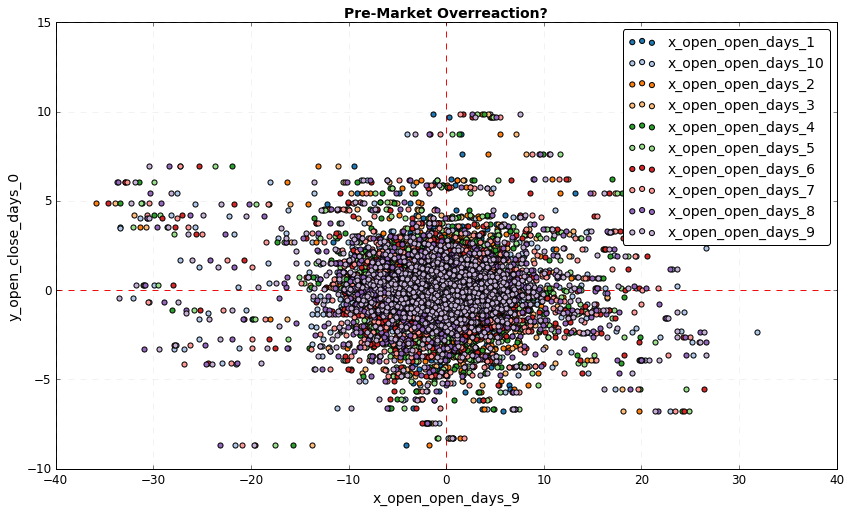

In [32]:
#df_stock_swap = df_stock.swaplevel(axis=1)
import matplotlib.patches as patches
# Close price change dependancy
f, ax = plt.subplots(1,1)
xs = [x for x in np.unique(df_stock.columns.get_level_values(level=0)) if 'x_open_open_days_' in x]
y = 'y_open_close_days_0'
#for days in []
for nr,x in enumerate(xs):
    #print(stock)
    df_sel = df_stock.stack(level=1)[[x,y]]
    #print('Neg:',df_sel[df_sel[x]<0][y].replace(np.inf,np.nan).dropna().mean())
    #print('Pos:',df_sel[df_sel[x]>0][y].replace(np.inf,np.nan).dropna().mean())
    df_sel.plot(ax=ax,kind='scatter',x=x,y=y,grid=True,s=26,color=tableau20[nr],edgecolor='black',legend=False,zorder=3)
ax.legend(xs)
ax.set_title('Pre-Market Overreaction?')
ax.axhline(0,ls = '--',color='red')
ax.axvline(0,ls = '--',color='red')
